In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
from library.sb_utils import save_file

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
path='https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Office_Products_v1_00.tsv.gz'
df=pd.read_csv(path, sep="\t", header=None,encoding='utf8',names=range(22))

When I first read the data, there was an error saying that the numbers of columns are inconsistent across the dataframe. The number 22 in the names option is the number of max columns in the dataframe.

In [5]:
df.shape

(2640353, 22)

Let's check the data.

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,review_headline,review_body,review_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US,43081963,R18RVCKGH1SSI9,B001BM2MAC,307809868,"Scotch Cushion Wrap 7961, 12 Inches x 100 Feet",Office Products,5,0,0,...,Five Stars,Great product.,2015-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US,10951564,R3L4L6LW1PUOFY,B00DZYEXPQ,75004341,"Dust-Off Compressed Gas Duster, Pack of 4",Office Products,5,0,1,...,"Phffffffft, Phfffffft. Lots of air, and it's C...",What's to say about this commodity item except...,2015-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US,21143145,R2J8AWXWTDX2TF,B00RTMUHDW,529689027,Amram Tagger Standard Tag Attaching Tagging Gu...,Office Products,5,0,0,...,but I am sure I will like it.,"Haven't used yet, but I am sure I will like it.",2015-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US,52782374,R1PR37BR7G3M6A,B00D7H8XB6,868449945,AmazonBasics 12-Sheet High-Security Micro-Cut ...,Office Products,1,2,3,...,and the shredder was dirty and the bin was par...,Although this was labeled as &#34;new&#34; the...,2015-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It seems that columns 15 to 21 contain mostly null values. Let us use describe to check them. 

In [7]:
df.describe(include = 'all')

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
count,2640353,2640353.0,2640353,2640353,2640353.0,2640353,2640353,2640339.0,2640336.0,2640336.0,...,2640307,2640256,2640320,98.000000,98.000000,98,98,98,98,98
unique,2,1796334.0,2640353,313154,292791.0,284381,19,14.0,870.0,915.0,...,1375433,2421352,5919,NaN,NaN,1,2,67,97,85
top,US,14587556.0,RURLHNB6O3JPI,B005QAQFFS,492022839.0,Panasonic Landline Telephone,Office Products,5.0,0.0,0.0,...,Five Stars,good,2015-02-23,NaN,NaN,N,Y,Five Stars,Good quality,2015-08-04
freq,2640352,478.0,1,5350,5307.0,6279,2640335,1499676.0,1769493.0,1625696.0,...,376679,5176,5049,NaN,NaN,98,93,23,2,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.704082,0.908163,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.349747,3.529220,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.750000,1.000000,NaN,NaN,NaN,NaN,NaN


Only 98 rows of colums 15 to 21 are not null. I think it's safe to just remove them.

In [8]:
droplist=15+np.arange(7)

In [9]:
df2=df.drop(droplist.tolist(), axis=1)

In [10]:
df2.rename(columns=df2.iloc[0],inplace=True)

In [11]:
df2.drop(index=0,inplace=True)

In [12]:
df2.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
1,US,43081963,R18RVCKGH1SSI9,B001BM2MAC,307809868,"Scotch Cushion Wrap 7961, 12 Inches x 100 Feet",Office Products,5,0,0,N,Y,Five Stars,Great product.,2015-08-31
2,US,10951564,R3L4L6LW1PUOFY,B00DZYEXPQ,75004341,"Dust-Off Compressed Gas Duster, Pack of 4",Office Products,5,0,1,N,Y,"Phffffffft, Phfffffft. Lots of air, and it's C...",What's to say about this commodity item except...,2015-08-31
3,US,21143145,R2J8AWXWTDX2TF,B00RTMUHDW,529689027,Amram Tagger Standard Tag Attaching Tagging Gu...,Office Products,5,0,0,N,Y,but I am sure I will like it.,"Haven't used yet, but I am sure I will like it.",2015-08-31
4,US,52782374,R1PR37BR7G3M6A,B00D7H8XB6,868449945,AmazonBasics 12-Sheet High-Security Micro-Cut ...,Office Products,1,2,3,N,Y,and the shredder was dirty and the bin was par...,Although this was labeled as &#34;new&#34; the...,2015-08-31
5,US,24045652,R3BDDDZMZBZDPU,B001XCWP34,33521401,"Derwent Colored Pencils, Inktense Ink Pencils,...",Office Products,4,0,0,N,Y,Four Stars,Gorgeous colors and easy to use,2015-08-31


In [13]:
df2.describe()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
count,2640352,2640352,2640352,2640352,2640352,2640352,2640352,2640338,2640335,2640335,2640335,2640335,2640306,2640255,2640319
unique,1,1796333,2640352,313153,292790,284380,18,13,869,914,2,2,1375432,2421351,5918
top,US,14587556,RURLHNB6O3JPI,B005QAQFFS,492022839,Panasonic Landline Telephone,Office Products,5,0,0,N,Y,Five Stars,good,2015-02-23
freq,2640352,478,1,5350,5307,6279,2640335,1499676,1769493,1625696,2611163,2256032,376679,5176,5049


In [14]:
df2.shape

(2640352, 15)

The number of null entries are quite small to the full data. Let's remove them.

In [15]:
df2.dropna(how='any',inplace=True)

In [16]:
df2.shape

(2640210, 15)

In [17]:
df2.reset_index(drop=True,inplace=True)

In [18]:
df2.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,43081963,R18RVCKGH1SSI9,B001BM2MAC,307809868,"Scotch Cushion Wrap 7961, 12 Inches x 100 Feet",Office Products,5,0,0,N,Y,Five Stars,Great product.,2015-08-31
1,US,10951564,R3L4L6LW1PUOFY,B00DZYEXPQ,75004341,"Dust-Off Compressed Gas Duster, Pack of 4",Office Products,5,0,1,N,Y,"Phffffffft, Phfffffft. Lots of air, and it's C...",What's to say about this commodity item except...,2015-08-31
2,US,21143145,R2J8AWXWTDX2TF,B00RTMUHDW,529689027,Amram Tagger Standard Tag Attaching Tagging Gu...,Office Products,5,0,0,N,Y,but I am sure I will like it.,"Haven't used yet, but I am sure I will like it.",2015-08-31
3,US,52782374,R1PR37BR7G3M6A,B00D7H8XB6,868449945,AmazonBasics 12-Sheet High-Security Micro-Cut ...,Office Products,1,2,3,N,Y,and the shredder was dirty and the bin was par...,Although this was labeled as &#34;new&#34; the...,2015-08-31
4,US,24045652,R3BDDDZMZBZDPU,B001XCWP34,33521401,"Derwent Colored Pencils, Inktense Ink Pencils,...",Office Products,4,0,0,N,Y,Four Stars,Gorgeous colors and easy to use,2015-08-31


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640210 entries, 0 to 2640209
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   marketplace        object
 1   customer_id        object
 2   review_id          object
 3   product_id         object
 4   product_parent     object
 5   product_title      object
 6   product_category   object
 7   star_rating        object
 8   helpful_votes      object
 9   total_votes        object
 10  vine               object
 11  verified_purchase  object
 12  review_headline    object
 13  review_body        object
 14  review_date        object
dtypes: object(15)
memory usage: 302.1+ MB


In [20]:
df2.describe()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
count,2640210,2640210,2640210,2640210,2640210,2640210,2640210,2640210,2640210,2640210,2640210,2640210,2640210,2640210,2640210
unique,1,1796235,2640210,313132,292769,284352,1,10,869,914,2,2,1375391,2421312,5918
top,US,14587556,RURLHNB6O3JPI,B005QAQFFS,492022839,Panasonic Landline Telephone,Office Products,5,0,0,N,Y,Five Stars,good,2015-02-23
freq,2640210,478,1,5350,5307,6279,2640210,1499607,1769436,1625648,2611039,2255929,376650,5176,5049


Let's check the type of data in each column.

In [21]:
for i in df2.columns:
    print(i,df2[i].map(type).unique())

marketplace [<class 'str'>]
customer_id [<class 'str'> <class 'int'>]
review_id [<class 'str'>]
product_id [<class 'str'>]
product_parent [<class 'str'> <class 'int'>]
product_title [<class 'str'>]
product_category [<class 'str'>]
star_rating [<class 'str'> <class 'int'> <class 'float'>]
helpful_votes [<class 'str'> <class 'int'> <class 'float'>]
total_votes [<class 'str'> <class 'int'> <class 'float'>]
vine [<class 'str'>]
verified_purchase [<class 'str'>]
review_headline [<class 'str'>]
review_body [<class 'str'>]
review_date [<class 'str'>]


Some of the columns have multiple data type. Let's convert them to one type.

In [22]:
df2['customer_id'].unique()

array(['43081963', '10951564', '21143145', ..., 52090046, 52503173,
       52585611], dtype=object)

In [23]:
df2[['customer_id']]=df2[['customer_id']].astype(int)

In [24]:
df2['customer_id'].unique()

array([43081963, 10951564, 21143145, ..., 52090046, 52503173, 52585611])

In [25]:
df2['customer_id'].dtype

dtype('int32')

In [26]:
df2['product_parent'].unique()

array(['307809868', '75004341', '529689027', ..., 45010061, 538411034,
       260230341], dtype=object)

In [27]:
df2[['product_parent']]=df2[['product_parent']].astype(int)

In [28]:
df2['product_parent'].dtype

dtype('int32')

In [29]:
df2['star_rating'].unique()

array(['5', '1', '4', '2', '3', 5, 3, 4, 2, 1], dtype=object)

In [30]:
df2[['star_rating']]=df2[['star_rating']].astype(int)

In [31]:
df2['helpful_votes'].unique()

array(['0', '2', '6', '1', '3', '5', '4', '12', '254', '7', '8', '17',
       '9', '110', '31', '38', '21', '36', '39', '56', '63', '61', '14',
       '221', '13', '15', '20', '33', '19', '11', '23', '10', '44', '16',
       '22', '27', '161', '41', '40', '24', '54', '32', '62', '42', '82',
       '105', '35', '18', '30', '276', '25', '55', '37', '165', '68',
       '47', '49', '132', '43', '45', '26', '71', '111', '28', '152',
       '96', '199', '75', '113', '117', '48', '50', '73', '98', '240',
       '112', '78', '127', '84', '66', '81', '29', '340', '67', '87', 0,
       21, 3, 1, 2, 7, 11, 5, 4, 26, 9, 20, 6, 10, 38, 15, 14, 66, 28, 37,
       25, 23, 33, 47, 95, 22, 278, 8, 123, 13, 17, 12, 18, 32, 43, 51,
       34, 19, 58, 55, 35, 77, 2280, 16, 256, 53, 45, 96, 27, 215, 253,
       24, 49, 73, 90, 88, 830, 31, 30, 59, 100, 69, 102, 163, 247, 48,
       63, 158, 111, 36, 263, 173, 52, 116, 44, 227, 54, 87, 62, 104, 78,
       220, 423, 29, 50, 64, 164, 39, 40, 260, 115, 42, 144

In [32]:
df2[['helpful_votes']]=df2[['helpful_votes']].astype(int)

In [33]:
df2['total_votes'].unique()

array(['0', '1', '3', '6', '2', '10', '5', '9', '12', '254', '7', '17',
       '4', '8', '19', '159', '31', '38', '11', '21', '36', '47', '65',
       '63', '64', '16', '221', '14', '18', '32', '20', '34', '13', '24',
       '44', '30', '28', '170', '42', '52', '22', '29', '56', '46', '43',
       '86', '27', '115', '15', '23', '33', '276', '26', '35', '58', '39',
       '175', '41', '70', '53', '136', '49', '25', '72', '62', '112',
       '68', '165', '131', '96', '75', '202', '76', '40', '114', '152',
       '120', '57', '51', '48', '50', '83', '102', '244', '113', '80',
       '54', '139', '85', '67', '158', '82', '368', '90', 0, 21, 3, 1, 2,
       7, 13, 11, 5, 4, 26, 9, 6, 10, 39, 15, 14, 16, 67, 29, 42, 33, 27,
       55, 8, 18, 99, 22, 278, 127, 23, 38, 12, 20, 63, 44, 37, 52, 59,
       83, 25, 2314, 19, 284, 54, 50, 24, 98, 219, 35, 82, 17, 93, 92,
       845, 31, 46, 28, 40, 60, 104, 74, 103, 173, 266, 48, 34, 30, 102,
       70, 81, 161, 111, 71, 36, 286, 120, 239, 91, 76, 

In [34]:
df2[['total_votes']]=df2[['total_votes']].astype(int)

 Let's check the first few strings of the 'review_date' column.

In [35]:
df2['review_date'].str[:4].value_counts()

2015    815733
2014    789283
2013    463910
2012    197667
2011    122061
2010     75125
2009     48893
2008     33515
2007     29114
2006     13330
2005     10796
2003      9920
2004      9217
2002      8536
2001      7190
2000      5102
1999       714
5           63
4           15
3            8
2            7
1998         6
1            5
Name: review_date, dtype: int64

In [36]:
df2['review_date'].str[:4].map(len).value_counts()

4    2640112
1         98
Name: review_date, dtype: int64

It seems that some of the data contain only one single number. Without other information, it's difficult to interpret these values. In addition, they are quite small. So, let's remove them. 

In [37]:
df3=df2[df2['review_date'].str[:4].map(len)==4]

In [38]:
df3['review_date'].str[:4].value_counts()

2015    815733
2014    789283
2013    463910
2012    197667
2011    122061
2010     75125
2009     48893
2008     33515
2007     29114
2006     13330
2005     10796
2003      9920
2004      9217
2002      8536
2001      7190
2000      5102
1999       714
1998         6
Name: review_date, dtype: int64

In [39]:
df3['review_date'] = pd.to_datetime(df3['review_date'])

In [40]:
df3['review_date'].head()

0   2015-08-31
1   2015-08-31
2   2015-08-31
3   2015-08-31
4   2015-08-31
Name: review_date, dtype: datetime64[ns]

In [41]:
df3.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,43081963,R18RVCKGH1SSI9,B001BM2MAC,307809868,"Scotch Cushion Wrap 7961, 12 Inches x 100 Feet",Office Products,5,0,0,N,Y,Five Stars,Great product.,2015-08-31
1,US,10951564,R3L4L6LW1PUOFY,B00DZYEXPQ,75004341,"Dust-Off Compressed Gas Duster, Pack of 4",Office Products,5,0,1,N,Y,"Phffffffft, Phfffffft. Lots of air, and it's C...",What's to say about this commodity item except...,2015-08-31
2,US,21143145,R2J8AWXWTDX2TF,B00RTMUHDW,529689027,Amram Tagger Standard Tag Attaching Tagging Gu...,Office Products,5,0,0,N,Y,but I am sure I will like it.,"Haven't used yet, but I am sure I will like it.",2015-08-31
3,US,52782374,R1PR37BR7G3M6A,B00D7H8XB6,868449945,AmazonBasics 12-Sheet High-Security Micro-Cut ...,Office Products,1,2,3,N,Y,and the shredder was dirty and the bin was par...,Although this was labeled as &#34;new&#34; the...,2015-08-31
4,US,24045652,R3BDDDZMZBZDPU,B001XCWP34,33521401,"Derwent Colored Pencils, Inktense Ink Pencils,...",Office Products,4,0,0,N,Y,Four Stars,Gorgeous colors and easy to use,2015-08-31


In [42]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2640112 entries, 0 to 2640209
Data columns (total 15 columns):
 #   Column             Dtype         
---  ------             -----         
 0   marketplace        object        
 1   customer_id        int32         
 2   review_id          object        
 3   product_id         object        
 4   product_parent     int32         
 5   product_title      object        
 6   product_category   object        
 7   star_rating        int32         
 8   helpful_votes      int32         
 9   total_votes        int32         
 10  vine               object        
 11  verified_purchase  object        
 12  review_headline    object        
 13  review_body        object        
 14  review_date        datetime64[ns]
dtypes: datetime64[ns](1), int32(5), object(9)
memory usage: 271.9+ MB


Before we move forward, we need to decide on the metric to decide whether a review is trustworthy. The 'helpful_votes' feature looks promising. So, let's take a look.

In [49]:
import seaborn as sns
sns.set(font_scale = 1.3)

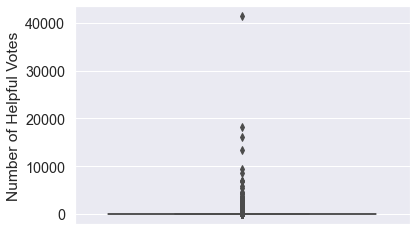

In [65]:
ax = sns.boxplot(y='helpful_votes', data=df3)
ax.set(ylabel='Number of Helpful Votes')
plt.savefig("helpful_votes_number.png", bbox_inches="tight")
plt.show()

The range of 'helpful_votes' are too wide with too many outliner. Let's create a new feature called: "helpful_cotes_ratio" as the ratio between help_votes and total_votes.

In [56]:
df3['helpful_votes_ratio']=0.0

In [57]:
df3.loc[df3['total_votes'] != 0,'helpful_votes_ratio']=df3[df3['total_votes'] != 0]['helpful_votes'].astype(float)/df3[df3['total_votes'] != 0]['total_votes'].astype(float)

Let's plot some of the features to check for outliner.

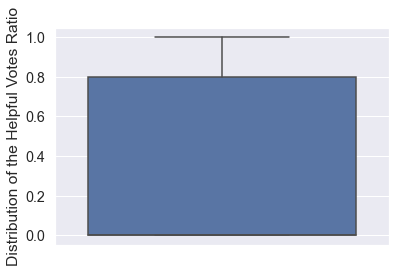

In [61]:
ax2 = sns.boxplot( y='helpful_votes_ratio', data=df3)
ax2.set( ylabel='Distribution of the Helpful Votes Ratio')
plt.savefig("helpful_votes_ratio.png")
plt.show()

This is much improvement. Now, let's check for outlier.

In [66]:
df3['total_votes'].max()

41866

In [67]:
df3[df3['total_votes']==df3['total_votes'].max()]

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,helpful_votes_ratio
2167784,US,50268169,R19XO9PS38WRWO,B004F9QBE6,596552794,"BIC Cristal For Her Ball Pen, 1.0mm, Black, 16...",Office Products,5,41393,41866,N,N,FINALLY!,Someone has answered my gentle prayers and FIN...,2012-08-24,0.988702


In [68]:
df3.loc[2167784,'review_body']

"Someone has answered my gentle prayers and FINALLY designed a pen that I can use all month long! I use it when I'm swimming, riding a horse, walking on the beach and doing yoga. It's comfortable, leak-proof, non-slip and it makes me feel so feminine and pretty! Since I've begun using these pens, men have found me more attractive and approchable. It has given me soft skin and manageable hair and it has really given me the self-esteem I needed to start a book club and flirt with the bag-boy at my local market. My drawings of kittens and ponies have improved, and now that I'm writing my last name hyphenated with the Robert Pattinson's last name, I really believe he may some day marry me! I'm positively giddy. Those smart men in marketing have come up with a pen that my lady parts can really identify with.<br /><br />Where has this pen been all my life???"

This review is completely nonsense for a pen. Let's remove it. This sounds like a prank.

In [87]:
df4=df3.drop(index=2167784)

In [88]:
df4[['helpful_votes']].describe()

,helpful_votes
count,2.640111e+06
mean,1.886628e+00
std,2.686637e+01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.000000e+00
max,1.821700e+04


<AxesSubplot:>

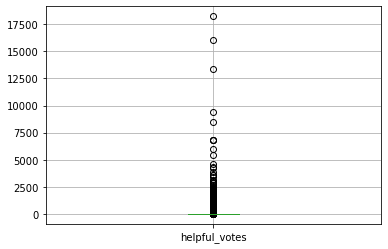

In [89]:
df4[['helpful_votes']].boxplot()

<AxesSubplot:>

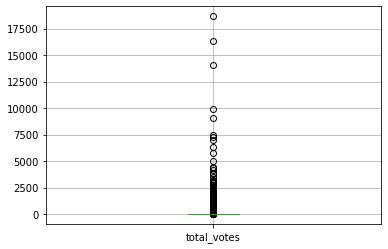

In [90]:
df4[['total_votes']].boxplot()

In [91]:
df4.loc[df4[df4['total_votes']==df4['total_votes'].max()].index]

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,helpful_votes_ratio
2165806,US,29167258,R2PKU2MR4GXKG7,B004F9QBE6,596552794,"BIC Cristal For Her Ball Pen, 1.0mm, Black, 16...",Office Products,1,18217,18648,N,N,Missing the batteries,"I can't find a switch to turn it on, and it di...",2012-08-28,0.976888


The next outliner is also pretty weird. The product is a pen but it mentions battery. It's even more strange this is the same product. Let's check the product specifically and compare it to other products.

<AxesSubplot:>

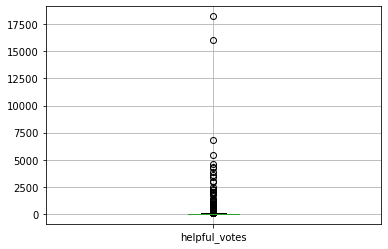

In [92]:
df4[df4['product_id']=='B004F9QBE6'][['helpful_votes']].boxplot()

<AxesSubplot:>

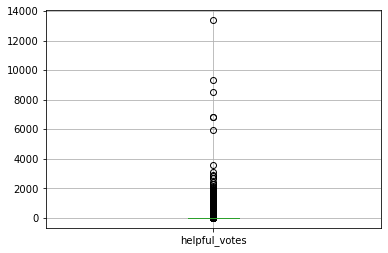

In [93]:
df4[df4['product_id']!='B004F9QBE6'][['helpful_votes']].boxplot()

Other products also have many outliner. Let's check a different feature: "verified_purchase".

<AxesSubplot:>

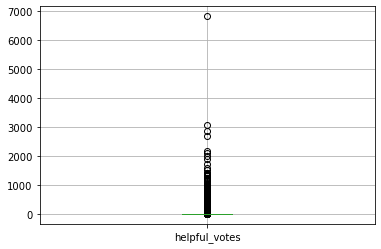

In [94]:
df4[df4['verified_purchase']=='Y'][['helpful_votes']].boxplot()

Hmm, the outliner is much smaller. Let's see how much data has been taken out using this feature.

In [95]:
df4[df4['verified_purchase']=='Y'].describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes,helpful_votes_ratio
count,2.255839e+06,2.255839e+06,2.255839e+06,2.255839e+06,2.255839e+06,2.255839e+06
mean,2.853273e+07,4.977244e+08,4.148925e+00,1.235769e+00,1.488756e+00,2.551940e-01
std,1.536502e+07,2.884760e+08,1.331552e+00,1.139431e+01,1.189656e+01,4.185744e-01
min,1.004900e+04,8.550000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.494642e+07,2.440889e+08,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.755064e+07,4.985021e+08,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.293682e+07,7.465106e+08,5.000000e+00,1.000000e+00,1.000000e+00,6.000000e-01
max,5.309657e+07,9.999961e+08,5.000000e+00,6.832000e+03,6.995000e+03,1.000000e+00


Not so much. Let's use verified_purchase from now on.

In [96]:
df5=df4[df4['verified_purchase']=='Y']

Now, let's check the most outliner of the verified purchase.

In [98]:
df5[df5['total_votes']==df5['total_votes'].max()]

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,helpful_votes_ratio
1314436,US,23956847,R3VRMWPRRRDCCT,B00AVWKUJS,646333008,Canon Office and Business MX922 All in One Pri...,Office Products,4,6832,6995,N,Y,A MUST READ REVIEW IF SERIOUSLY IN THE MARKET ...,This is my first review on any product on Amaz...,2014-07-01,0.976698


In [99]:
df5.loc[1314436,'review_body']

"This is my first review on any product on Amazon, this review will be on the [[ASIN:B00AVWKUJS Canon PIXMA MX922 Wireless Color Photo Printer with Scanner, Copier and Fax]]. After reading almost 75 reviews this will be focusing on the reviews with 1-2 stars. First to the complaints on the wireless air-print from Ios or Android, if you setup the printer using WPS your phone will never pick up the printer or will appear offline. You have to select WLAN Setup from Menu on the printer then select other setup options on the LCD screen then select standard setup and find your router then select and type in your password then connect. Also you have to make sure your phone is on the same channel, so especially if you have a dual-band router and your phone is on the 5ghz channel and the printer is on the 2.4ghz channel you will also run into problems. So every thing has to be on same channel, phone on 2.4ghz then the printer has to be on 2.4ghz channel then you will have absolutely no problems

This review is very detailed and useful!

In [100]:
df5.groupby('star_rating').sum()[['helpful_votes','total_votes']]

,helpful_votes,total_votes
star_rating,,
1,493475.0,682618.0
2,183622.0,243469.0
3,259833.0,329613.0
4,455392.0,522005.0
5,1395375.0,1580688.0


In [101]:
df4.groupby(['star_rating', 'verified_purchase']).sum()[['helpful_votes','total_votes']]

helpful_votes  total_votes
star_rating verified_purchase                            
1           N                       473183.0     615737.0
            Y                       493475.0     682618.0
2           N                       162888.0     201050.0
            Y                       183622.0     243469.0
3           N                       234146.0     271629.0
            Y                       259833.0     329613.0
4           N                       406871.0     447687.0
            Y                       455392.0     522005.0
5           N                       916122.0    1016225.0
            Y                      1395375.0    1580688.0

In [102]:
# save the data to a new csv file
datapath = 'data'
save_file(df5, 'verified_purchase.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)N

Please re-run this cell with a new filename.


In [103]:
# save the data to a new csv file
datapath = 'data'
save_file(df4, 'all_purchase.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)N

Please re-run this cell with a new filename.
